In [1]:
import pandas as pd
from termcolor import colored as cl 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/suraj/rds_cpu_utilization_cc0c53.csv')

In [3]:
df.isnull().values.any()

False

In [4]:
from sklearn import preprocessing
df['value'] = preprocessing.scale(df['value'])
df

,timestamp,value,IsAnomaly
0,14/02/2014 14:30,-0.453498,0
1,14/02/2014 14:35,-0.628741,0
2,14/02/2014 14:40,-0.504976,0
3,14/02/2014 14:45,-0.628741,0
4,14/02/2014 14:50,-0.616145,0
...,...,...,...
4027,28/02/2014 14:10,2.038428,0
4028,28/02/2014 14:15,1.744513,0
4029,28/02/2014 14:20,2.016522,0
4030,28/02/2014 14:25,1.596652,0


In [5]:
x = df

In [6]:
x

,timestamp,value,IsAnomaly
0,14/02/2014 14:30,-0.453498,0
1,14/02/2014 14:35,-0.628741,0
2,14/02/2014 14:40,-0.504976,0
3,14/02/2014 14:45,-0.628741,0
4,14/02/2014 14:50,-0.616145,0
...,...,...,...
4027,28/02/2014 14:10,2.038428,0
4028,28/02/2014 14:15,1.744513,0
4029,28/02/2014 14:20,2.016522,0
4030,28/02/2014 14:25,1.596652,0


In [7]:
x = x.drop('IsAnomaly', axis = 1)
x = x.drop('timestamp', axis = 1)

In [8]:
df

,timestamp,value,IsAnomaly
0,14/02/2014 14:30,-0.453498,0
1,14/02/2014 14:35,-0.628741,0
2,14/02/2014 14:40,-0.504976,0
3,14/02/2014 14:45,-0.628741,0
4,14/02/2014 14:50,-0.616145,0
...,...,...,...
4027,28/02/2014 14:10,2.038428,0
4028,28/02/2014 14:15,1.744513,0
4029,28/02/2014 14:20,2.016522,0
4030,28/02/2014 14:25,1.596652,0


In [9]:
x

,value
0,-0.453498
1,-0.628741
2,-0.504976
3,-0.628741
4,-0.616145
...,...
4027,2.038428
4028,1.744513
4029,2.016522
4030,1.596652


In [10]:
y = df

In [11]:
y = y.drop('timestamp', axis = 1)

In [12]:
y = y.drop('value', axis = 1)

In [13]:
y

,IsAnomaly
0,0
1,0
2,0
3,0
4,0
...,...
4027,0
4028,0
4029,0
4030,0


In [14]:
df1 = pd.read_csv('/content/drive/MyDrive/suraj/rds_cpu_utilization_e47b3b.csv')

In [15]:
df1.isnull().values.any()

True

In [16]:
df1 = df.apply (pd.to_numeric, errors='coerce')
df1 = df.dropna()

In [17]:
df1.isnull().values.any()

False

In [18]:
x1 = df1

In [19]:
x1 = x1.drop('IsAnomaly', axis = 1)

In [20]:
x1 = x1.drop('timestamp', axis = 1)

In [21]:
y1 = df1

In [22]:
y1 = y1.drop('timestamp', axis = 1)

In [23]:
y1 = y1.drop('value', axis = 1)

In [24]:
x1

,value
0,-0.453498
1,-0.628741
2,-0.504976
3,-0.628741
4,-0.616145
...,...
4027,2.038428
4028,1.744513
4029,2.016522
4030,1.596652


In [25]:
y1

,IsAnomaly
0,0
1,0
2,0
3,0
4,0
...,...
4027,0
4028,0
4029,0
4030,0


In [26]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.neural_network import MLPClassifier
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x, y)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x,y)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [28]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(x1)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

[[4030    0]
 [   2    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4030
           1       0.00      0.00      0.00         2

    accuracy                           1.00      4032
   macro avg       0.50      0.50      0.50      4032
weighted avg       1.00      1.00      1.00      4032



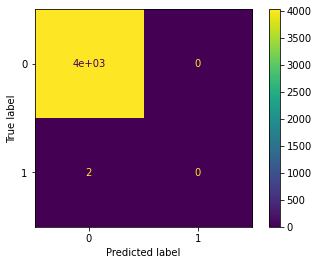

In [29]:
print(confusion_matrix(y1,y_pred))
print(classification_report(y1,y_pred))
plot_confusion_matrix(clf, x1, y1)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1, y_pred))

Accuracy: 0.9995039682539683
